In [1]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
# library(xkcd)
# library(sysfonts)

source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggridges’ was built under R version 3.4.4”Warning message:
“package ‘ggthemes’ was built under R version 3.4.4”
Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths



In [2]:
#get correct home path based on os 
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/Krista/'}

agg_data_path = paste0(home,'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

fig_path = paste0(home,'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/figures/')

In [3]:
reg_obs_data <- read_csv('all_reg_obs_data.csv',col_types = cols())
sim_data <- read_csv('probC_sim_learning_signals_processed.csv',col_types = cols())

Warning message:
“Missing column names filled in: 'X1' [1]”

In [11]:
sim_data['shifted_epoch_trial_zero_idx'] = reg_obs_data['shifted_epoch_trial_zero_idx']

In [4]:
reg_obs_data$p_id_acc = as.numeric(reg_obs_data$response == reg_obs_data$stimulus)

In [5]:
head(reg_obs_data)
names(reg_obs_data)


X1 response stimulus rt        condition subj_idx B          cpp       
1 0  0        0        0.7115700 hc        761       0.0000000 0.09947117
2 1  1        0        0.6814098 hc        761       0.0000000 0.03507879
3 2  0        0        0.7671180 hc        761      -1.2410069 0.02307522
4 3  1        0        0.5072088 hc        761      -0.5957808 0.01988090
5 4  0        0        0.6562591 hc        761      -0.3061348 0.01853869
6 5  0        0        0.3423209 hc        761      -0.1393938 0.26853762
  cp_with_slow_fast epoch_trial_zero_idx shifted_epoch_trial_zero_idx epoch_n
1 1                 0                    0                            1      
2 0                 1                    1                            1      
3 0                 2                    2                            1      
4 0                 3                    3                            1      
5 0                 4                    4                            1      
6 0                 5                    5                            1      
  v_reg     t_reg     p_id_acc
1 0.3134567 0.1144716 1       
2 0.3134567 0.1161167 0       
3 0.1178726 0.1164233 1       
4 0.2195610 0.1165049 0       
5 0.2652095 0.1165392 1       
6 0.2914881 0.1101525 1

[1] "X1"                           "response"                    
 [3] "stimulus"                     "rt"                          
 [5] "condition"                    "subj_idx"                    
 [7] "B"                            "cpp"                         
 [9] "cp_with_slow_fast"            "epoch_trial_zero_idx"        
[11] "shifted_epoch_trial_zero_idx" "epoch_n"                     
[13] "v_reg"                        "t_reg"                       
[15] "p_id_acc"

In [77]:
plot(subset(reg_obs_data$epoch_trial_zero_idx, subj_idx == 761))

ERROR: Error in subset.default(reg_obs_data$epoch_trial_zero_idx, subj_idx == : object 'subj_idx' not found


In [ ]:
subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc')))

[1] "All values of t are equal to  0.328233843371628 \n Cannot calculate confidence intervals"

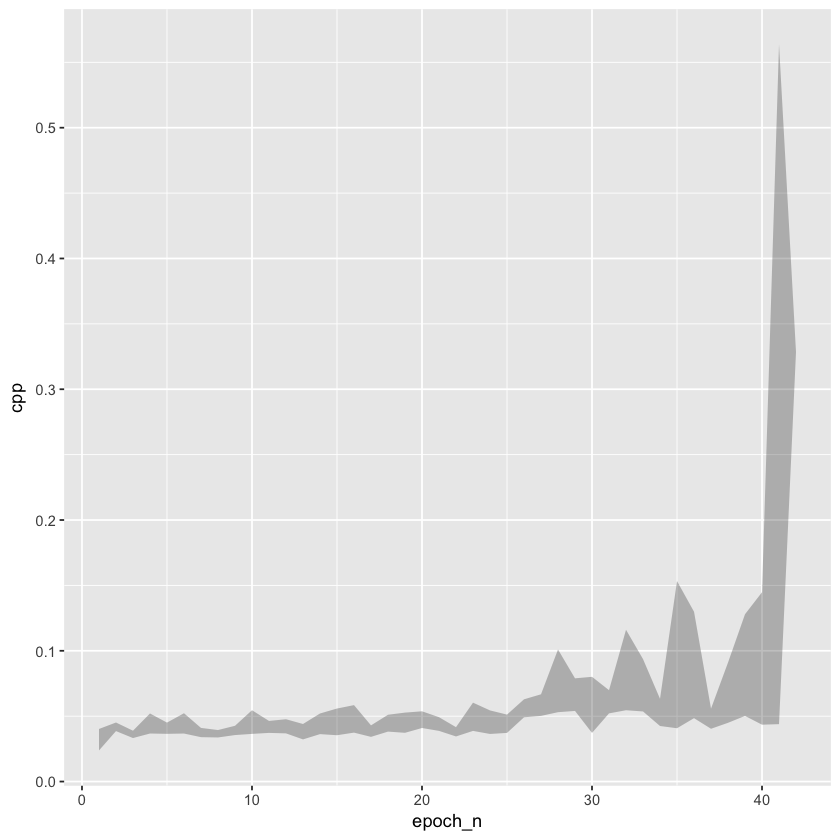

In [74]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_trial_zero_idx == 1 ), aes(epoch_n, cpp)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

[1] "All values of t are equal to  0.058765212927881 \n Cannot calculate confidence intervals"

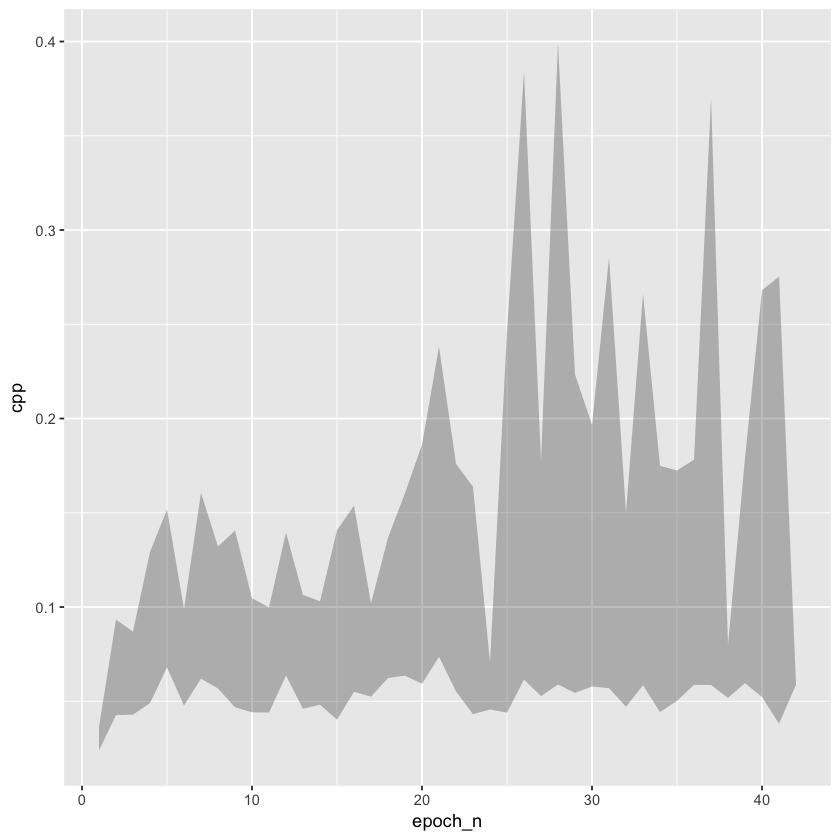

In [73]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_trial_zero_idx == 0 ), aes(epoch_n, cpp)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

In [100]:
head(sim_data)

cpp        target_B   choice_B  cp gen_drift   gen_bound rt    acc   subj_idx
1 0.09947117  0.0000000 0.0000000 1   0.01357246 0.4164061 0.700 False 0       
2 0.03507879  0.0000000 0.0000000 0   0.01357246 0.5994712 0.700 False 0       
3 0.02307522 -1.2410069 1.2410069 0   0.01357246 0.5350788 0.700 False 0       
4 0.01988090 -0.5957808 0.5957808 0  -1.00000000 0.5230752 0.172 False 0       
5 0.01853869 -0.3061348 0.3061348 0  -1.00000000 0.5198809 0.172 False 0       
6 0.26853762 -0.1393938 0.1393938 0  -1.00000000 0.5185387 0.172 False 0       
  ID  ⋯ correct_id_choices b_t0      b_t1      r_t1     r_t2     obs_cp trial
1 761 ⋯ 1                  0.0000000 0.0000000 2.528877 0.000000 0      1    
2 761 ⋯ 1                  1.3902137 0.1492068 0.000000 3.978021 1      2    
3 761 ⋯ 1                  0.7923717 0.1965910 0.000000 2.754457 0      3    
4 761 ⋯ 1                  0.5328022 0.2266674 0.000000 3.330826 0      4    
5 761 ⋯ 1                  0.3913762 0.2519824 0.000000 2.527291 0      5    
6 761 ⋯ 1                  0.3028040 0.2751190 3.036967 0.000000 1      6    
  ideal_B     B_ideal_target B_nonideal_target
1  0.00000000 0.0000000      0.0000000        
2 -1.24100692 0.1492068      1.3902137        
3 -0.59578078 0.1965910      0.7923717        
4 -0.30613483 0.2266674      0.5328022        
5 -0.13939379 0.2519824      0.3913762        
6 -0.02768502 0.2751190      0.3028040

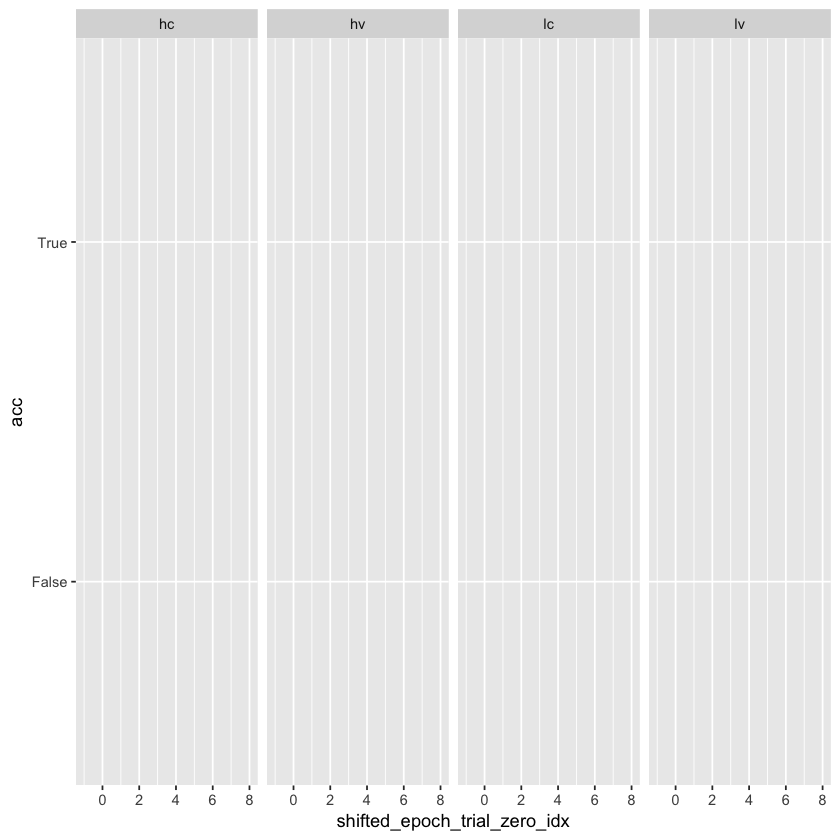

In [18]:
ggplot(subset(sim_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, acc)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)  + facet_grid(.~cond)

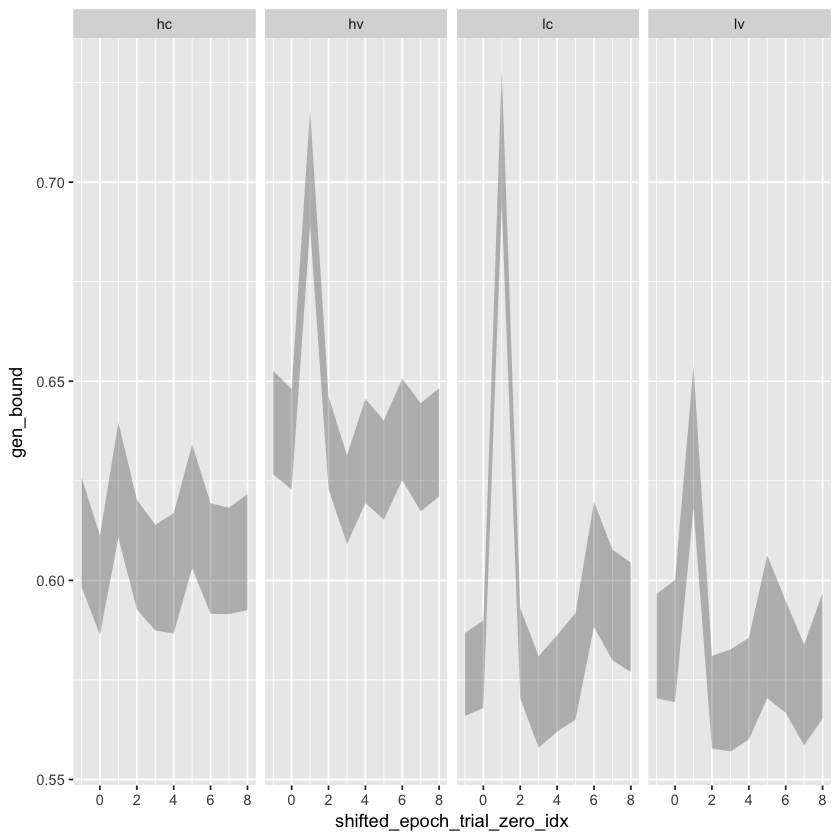

In [16]:
ggplot(subset(sim_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, gen_bound)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)  + facet_grid(.~cond)

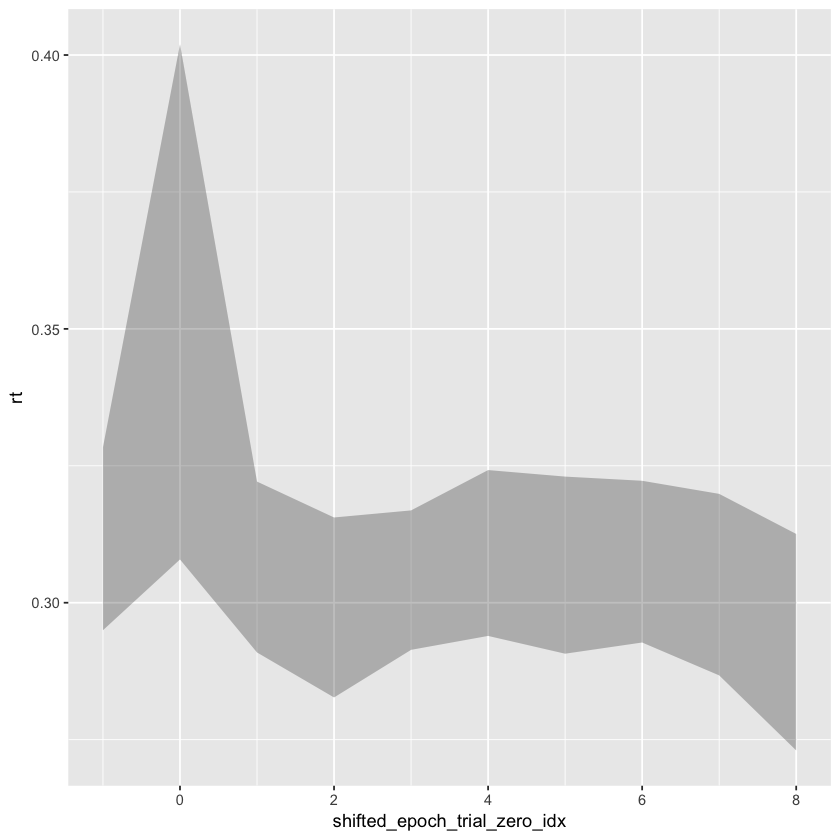

In [69]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 & epoch_n == 10), aes(shifted_epoch_trial_zero_idx, rt)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

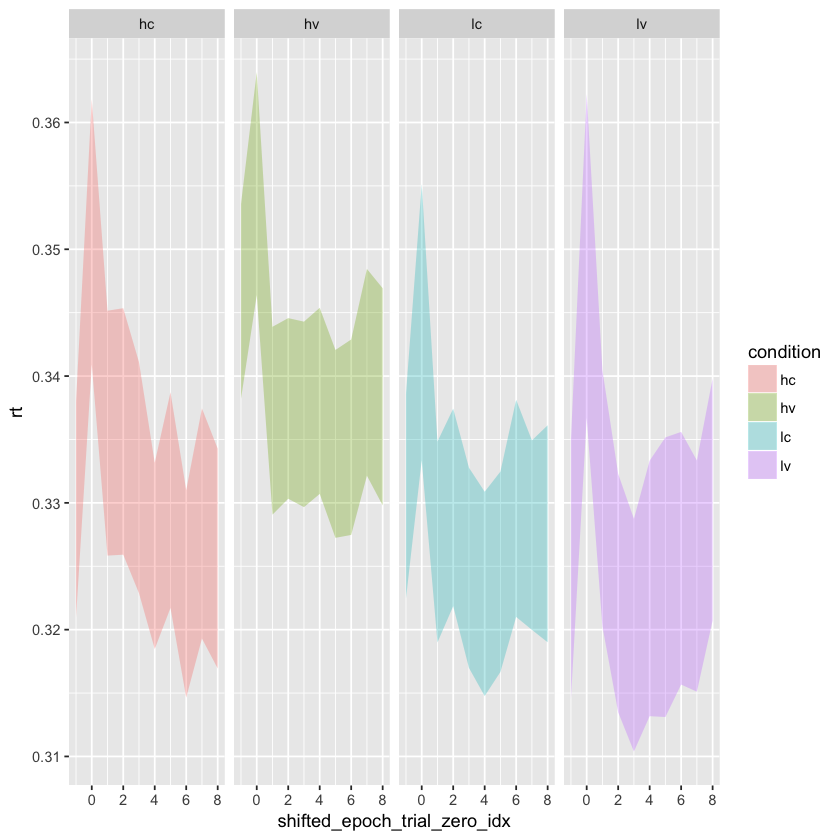

In [111]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

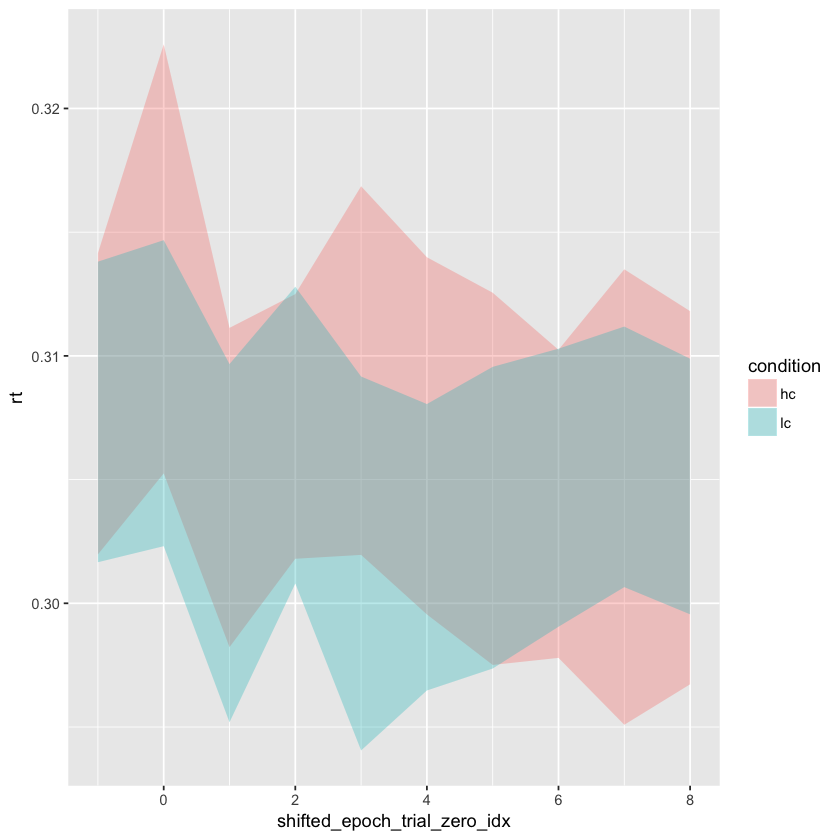

In [125]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) 

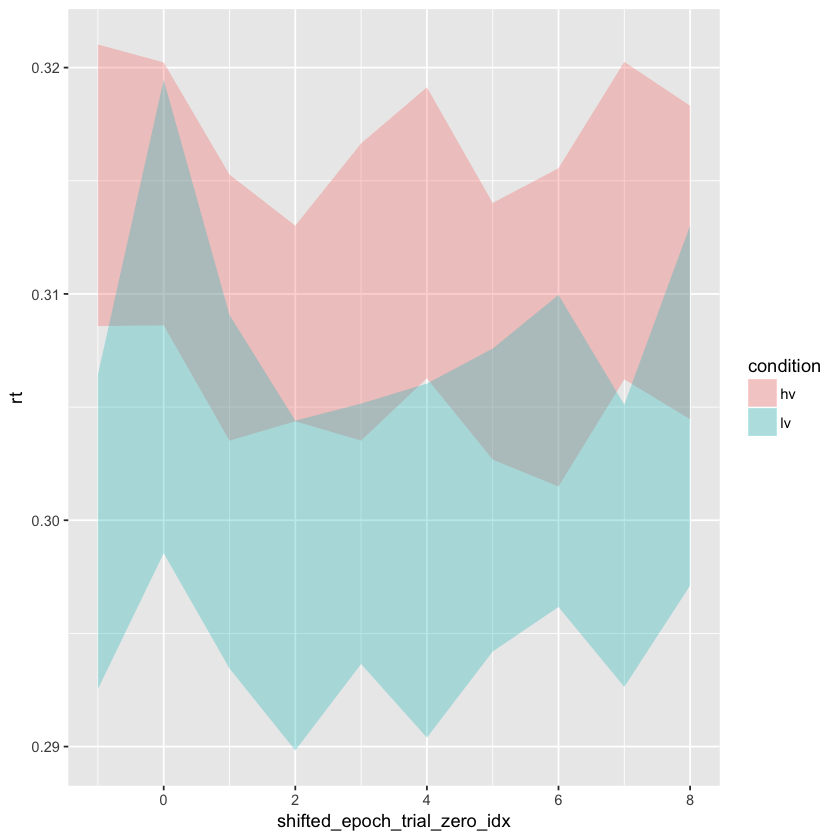

In [122]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lv'|condition=='hv')), aes(shifted_epoch_trial_zero_idx, rt, fill=condition)) + stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

In [140]:
# test = subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 10 &( condition == 'lc'|condition=='hc'))

# # x = aov(rt~subj_idx*condition, data=test)
# # summary(x)

# # x = aov(p_id_acc~subj_idx*condition, data=test)
# # summary(x)

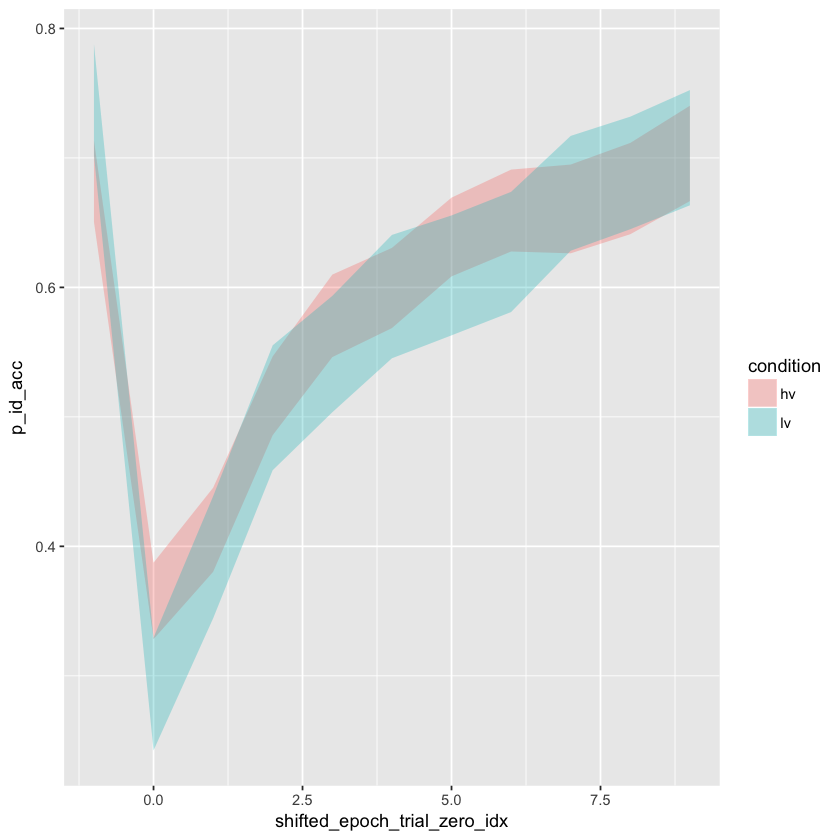

In [127]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 10 &( condition == 'lv'|condition=='hv')), aes(shifted_epoch_trial_zero_idx, p_id_acc, fill=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

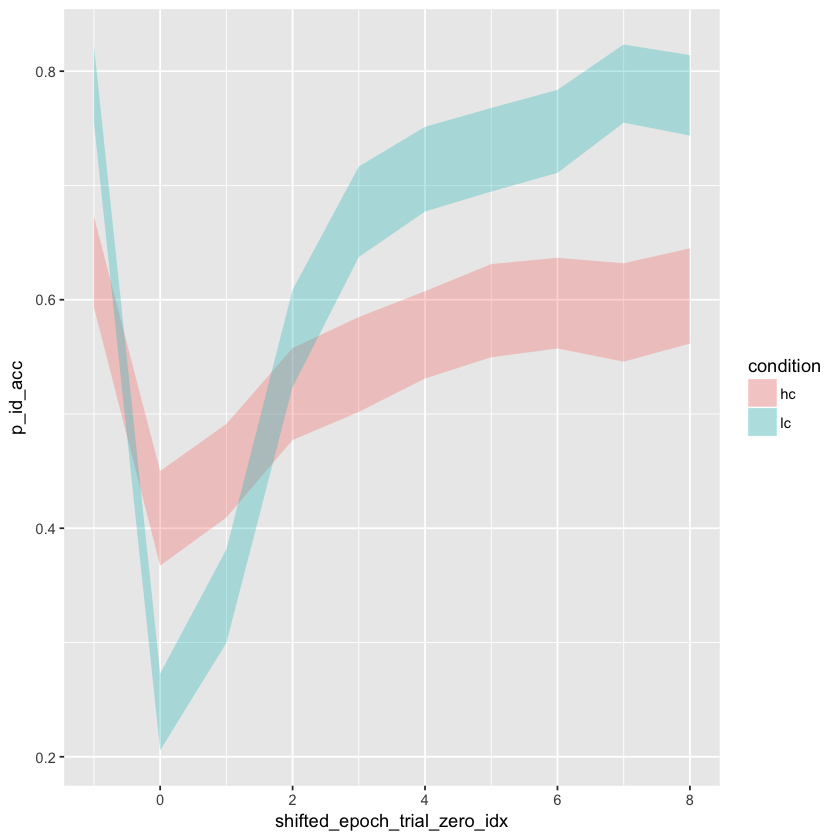

In [117]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9 &( condition == 'lc'|condition=='hc')), aes(shifted_epoch_trial_zero_idx, p_id_acc, fill=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3)

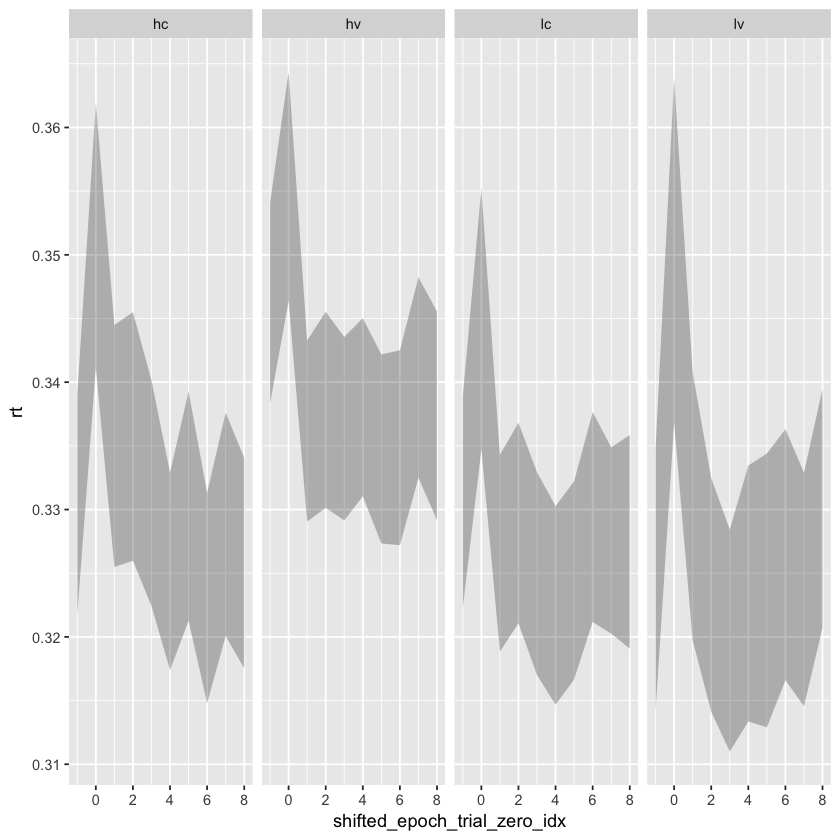

In [104]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, rt)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

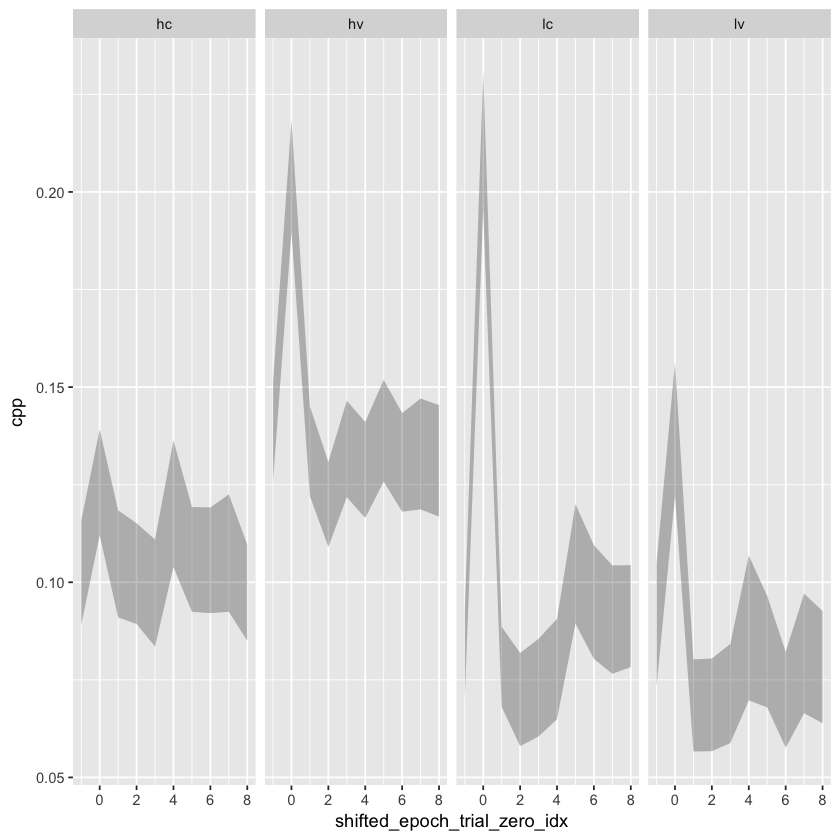

In [103]:
ggplot(subset(reg_obs_data, shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx < 9), aes(shifted_epoch_trial_zero_idx, cpp)) + stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3) + facet_grid(.~condition)  

In [10]:
reg_obs_data$subj_idx <-factor(reg_obs_data$subj_idx)

In [11]:
#sanity check
aov.rt=aov(formula = rt~condition + Error(subj_idx/condition), data=reg_obs_data)
summary(aov.rt)

pairwise.t.test(reg_obs_data$rt,reg_obs_data$condition, p.adj = "bonferroni")


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 23  46.29   2.012               

Error: subj_idx:condition
          Df Sum Sq Mean Sq F value Pr(>F)
condition  3   1.73  0.5767   1.557  0.208
Residuals 69  25.56  0.3704               

Error: Within
             Df Sum Sq Mean Sq F value Pr(>F)
Residuals 57504  587.4 0.01021               


	Pairwise comparisons using t tests with pooled SD 

data:  reg_obs_data$rt and reg_obs_data$condition 

   hc     hv     lc 
hv <2e-16 -      -  
lc 0.6    <2e-16 -  
lv 0.4    <2e-16 1.0

P value adjustment method: bonferroni 

In [12]:
model.tables(aov.rt, type = 'means')

Tables of means
Grand mean
          
0.3305833 

 condition 
condition
    hc     hv     lc     lv 
0.3289 0.3399 0.3269 0.3266 

In [13]:
names(reg_obs_data)

[1] "X1"                           "response"                    
 [3] "stimulus"                     "rt"                          
 [5] "condition"                    "subj_idx"                    
 [7] "B"                            "cpp"                         
 [9] "cp_with_slow_fast"            "epoch_trial_zero_idx"        
[11] "shifted_epoch_trial_zero_idx" "epoch_n"                     
[13] "v_reg"                        "t_reg"

In [141]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of drift rate 
reg_obs_data['v_reg_flipped'] = reg_obs_data$v_reg
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg'])

In [142]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of B
reg_obs_data['B_flipped'] = reg_obs_data$B
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B'])

In [143]:
reg_obs_data['accuracy'] = as.numeric(reg_obs_data$response == reg_obs_data$stimulus)
reg_obs_data['trial'] = rep(1:600, 24*4)

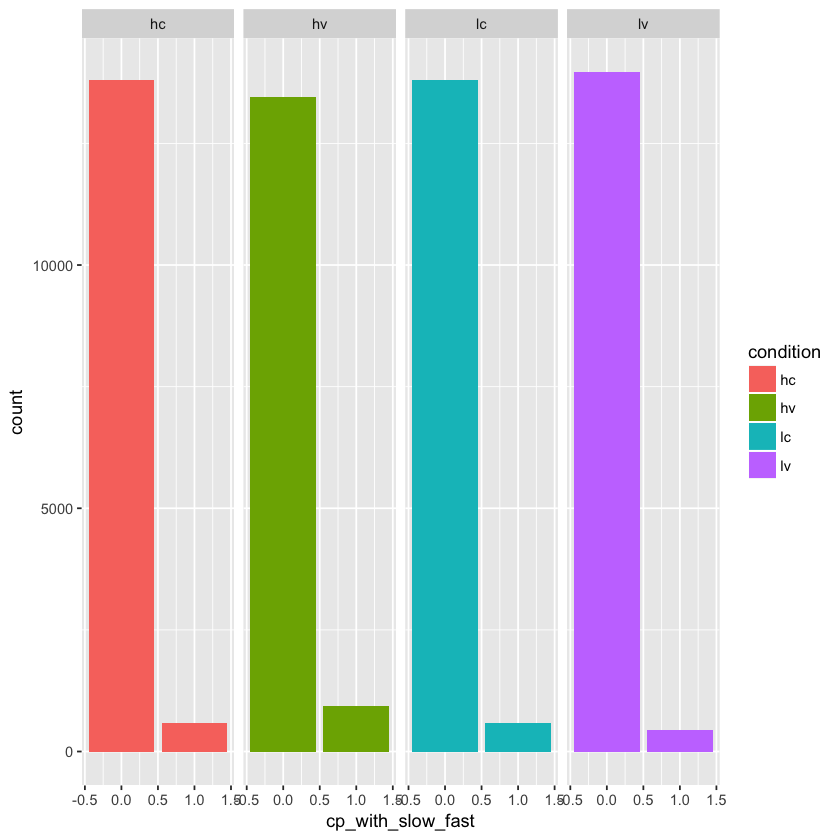

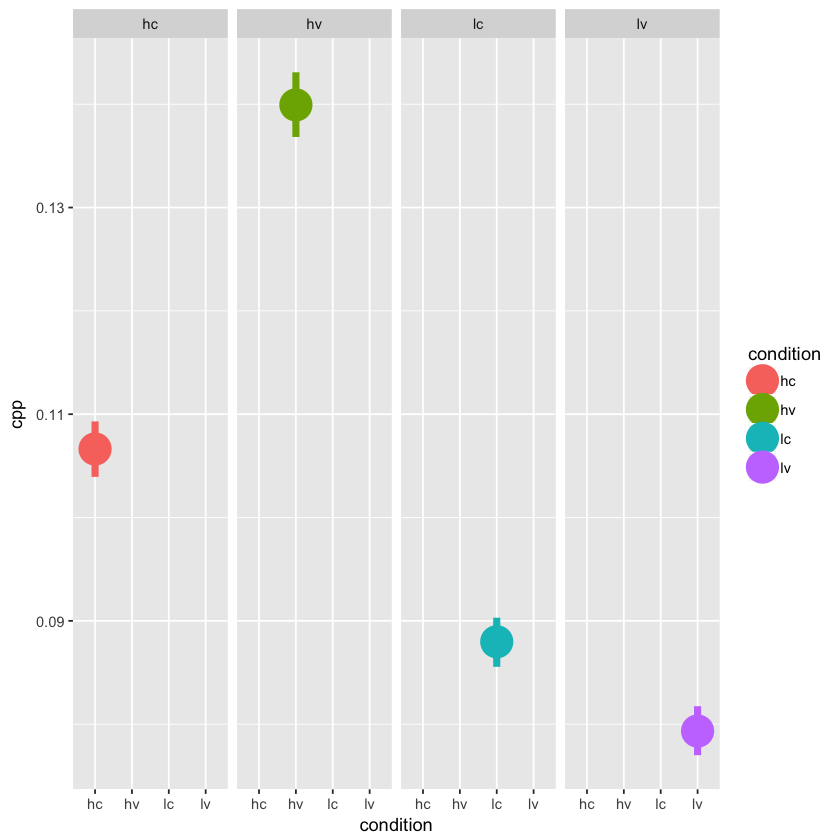

In [144]:
#sanity checks 
ggplot(reg_obs_data, aes(cp_with_slow_fast, fill=condition)) + geom_bar() + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=cpp, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

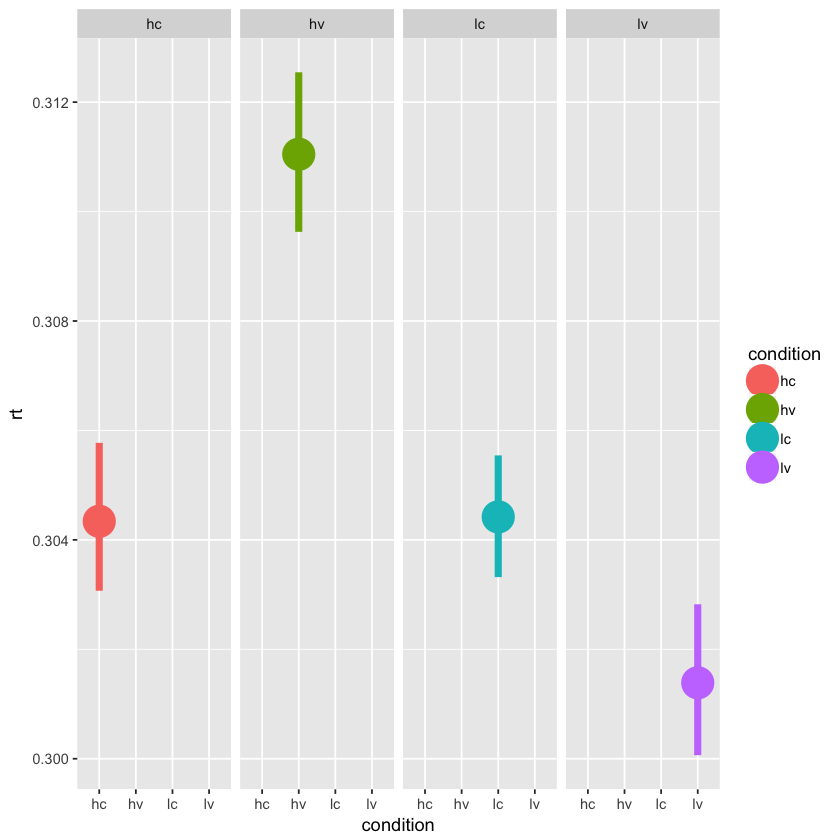

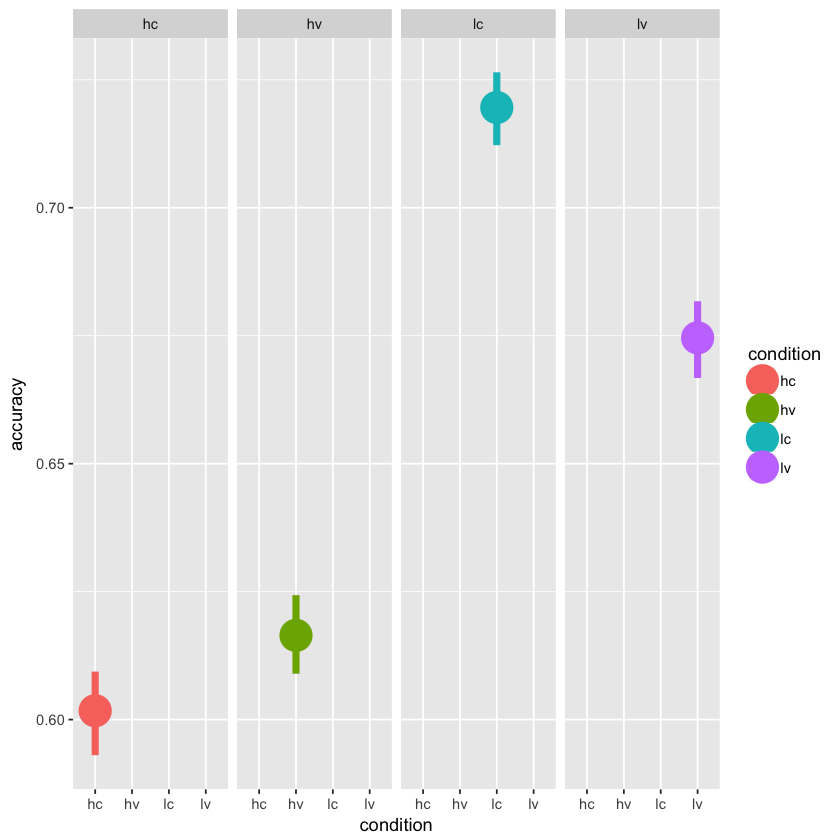

In [20]:
ggplot(reg_obs_data, aes(x=condition, y=rt, color=condition)) + stat_summary(fun.data = median_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=accuracy, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

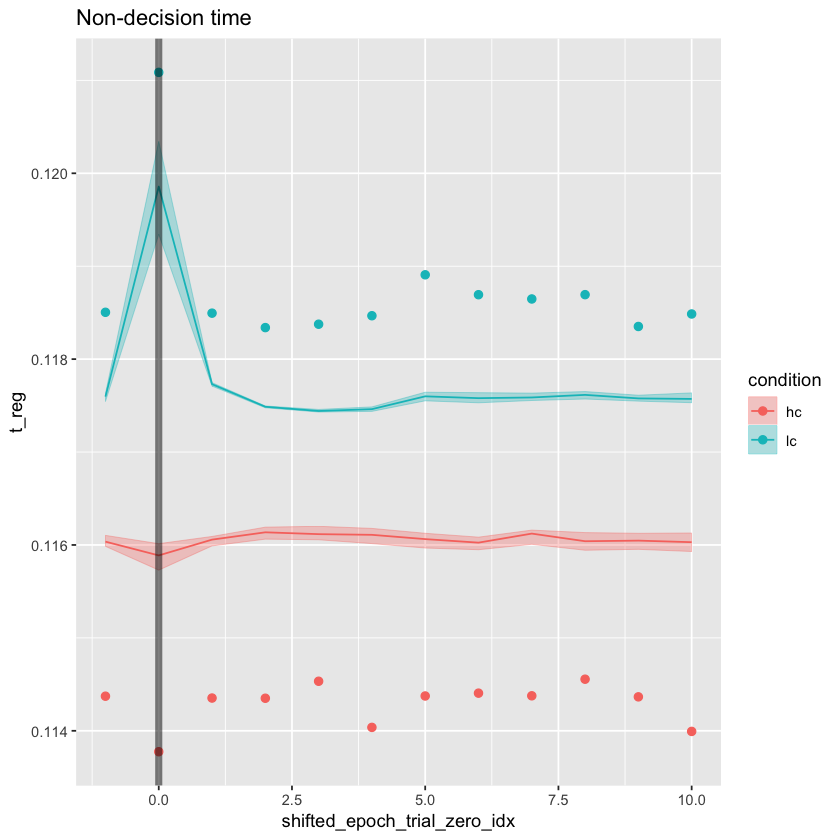

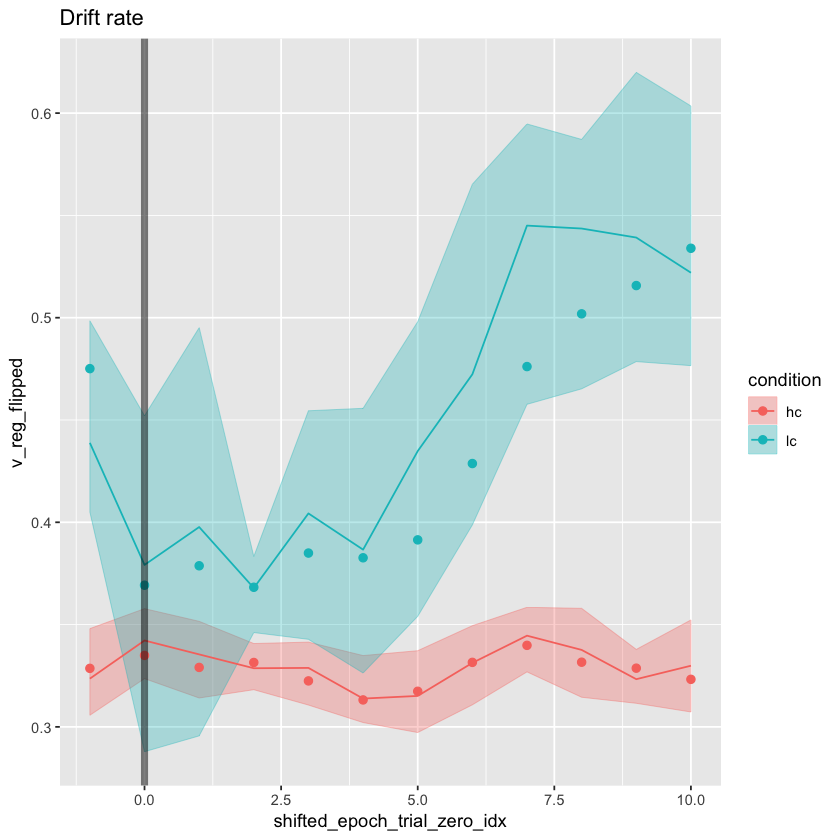

In [45]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time') 

ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

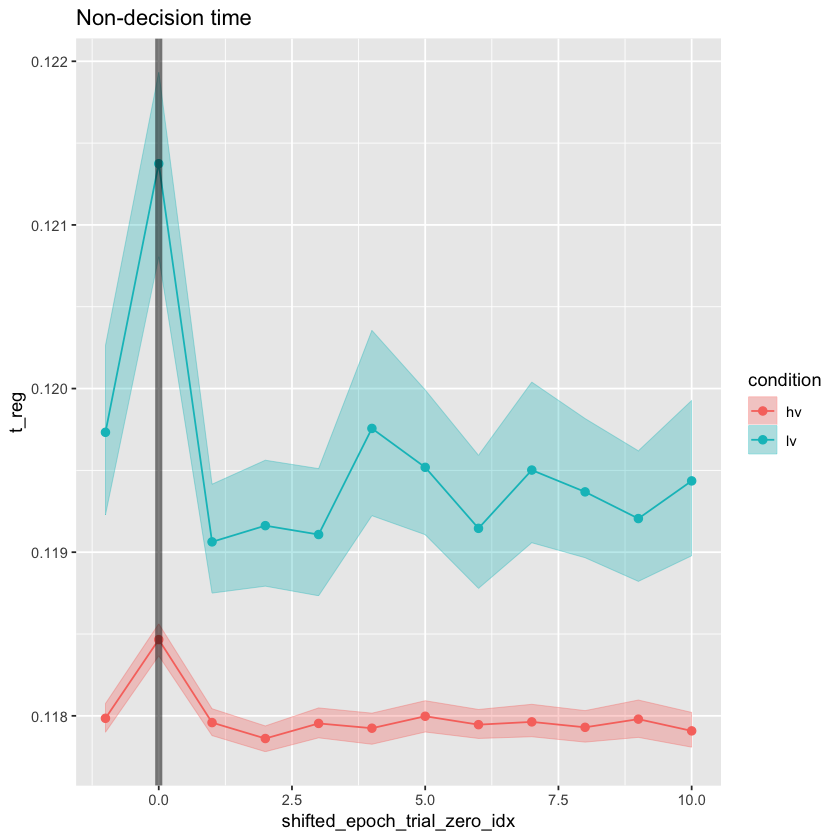

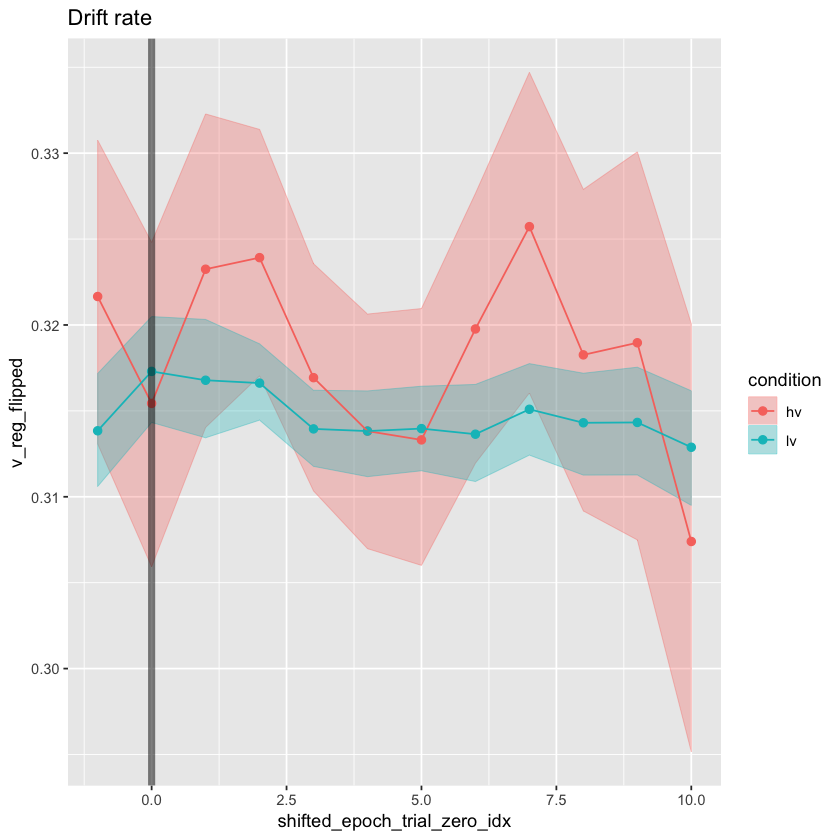

In [15]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time')

ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

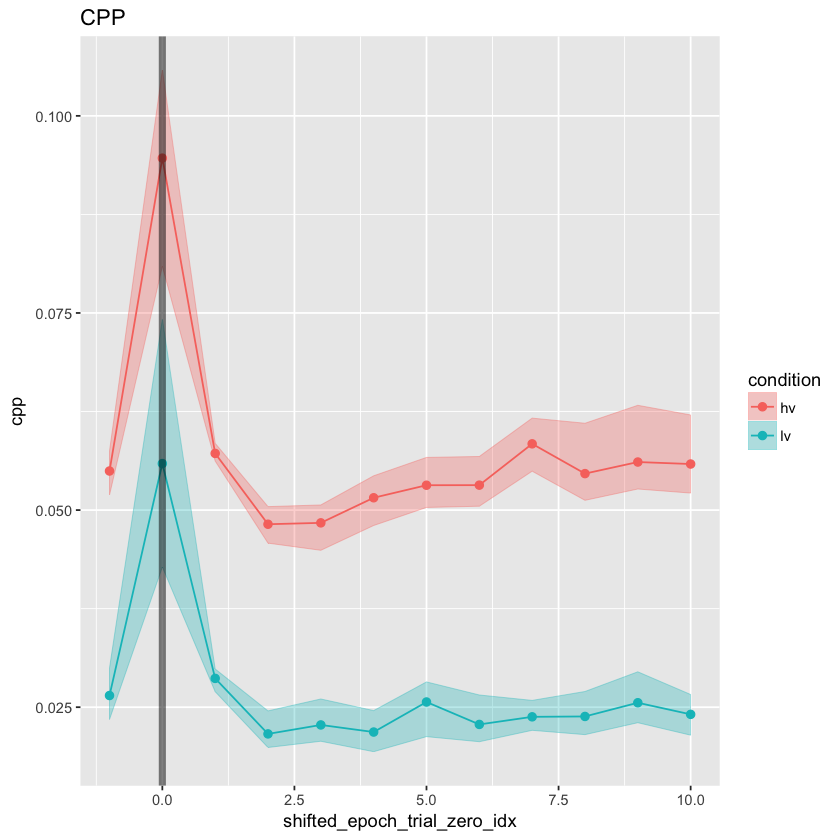

In [22]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
stat_summary(fun.data = median_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = median, geom = "point", size=2) +
stat_summary(fun.y = median, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

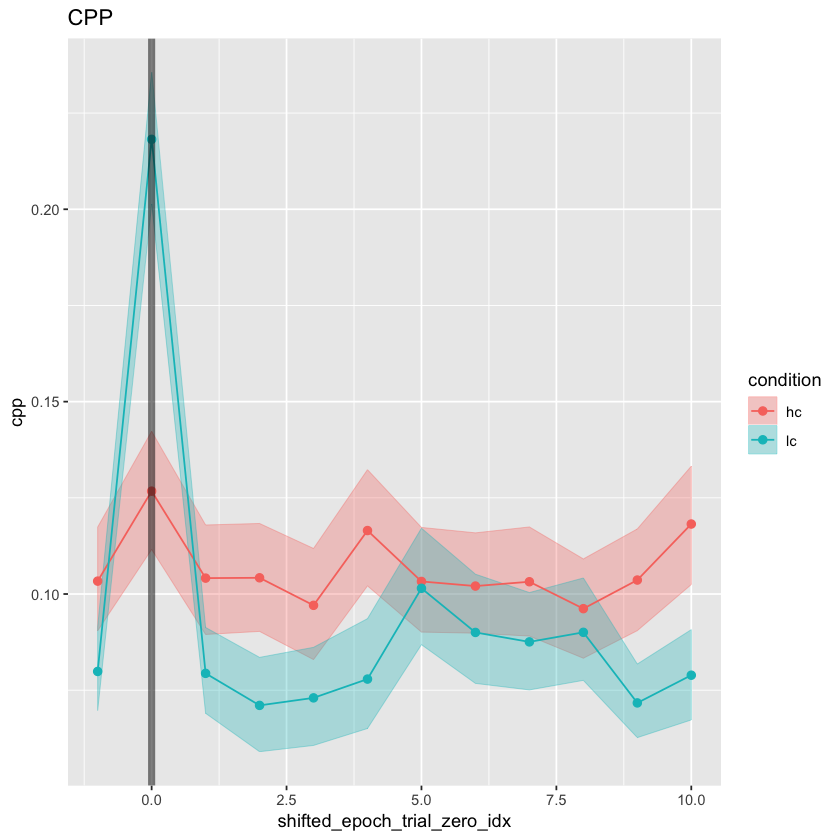

In [17]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'lc'| condition == 'hc'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

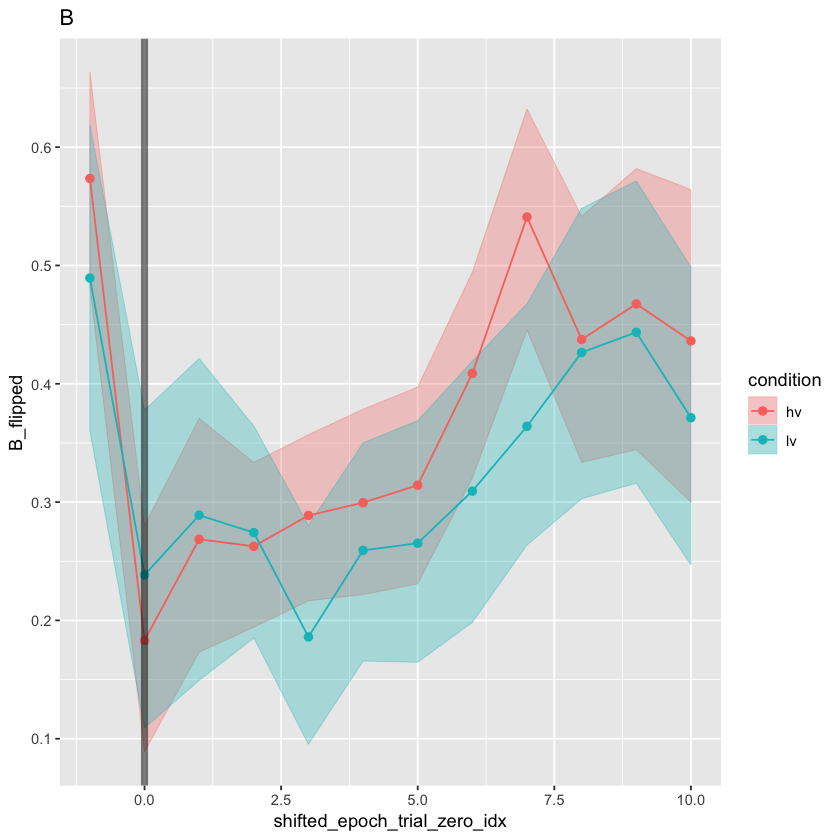

In [18]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')

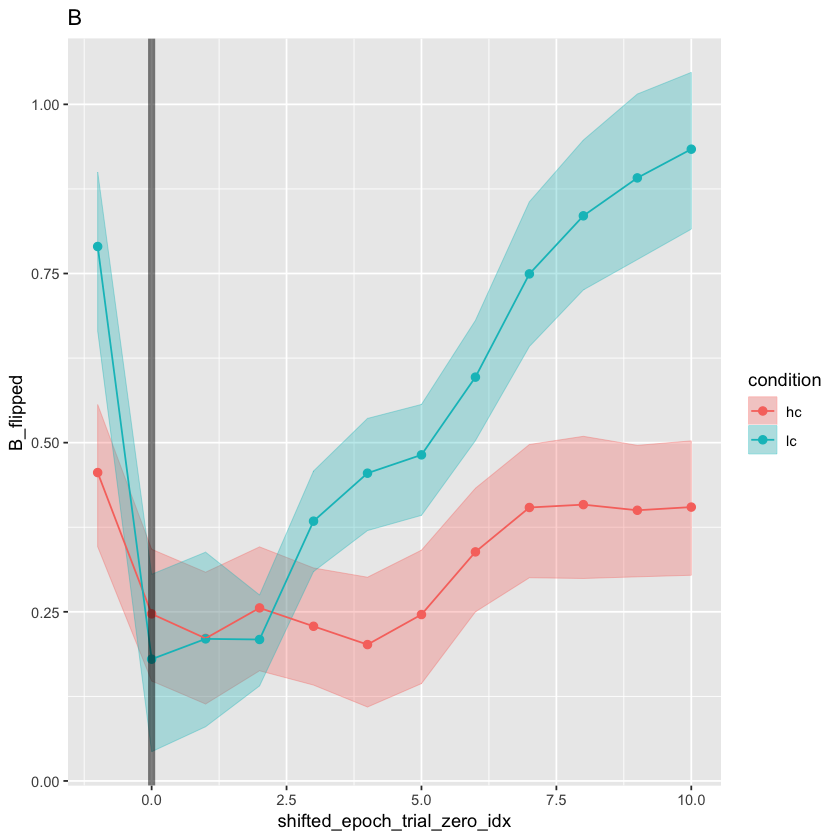

In [19]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')

ERROR while rich displaying an object: Error in eval(substitute(list(...)), `_data`, parent.frame()): object 'violinwidth' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_gtab

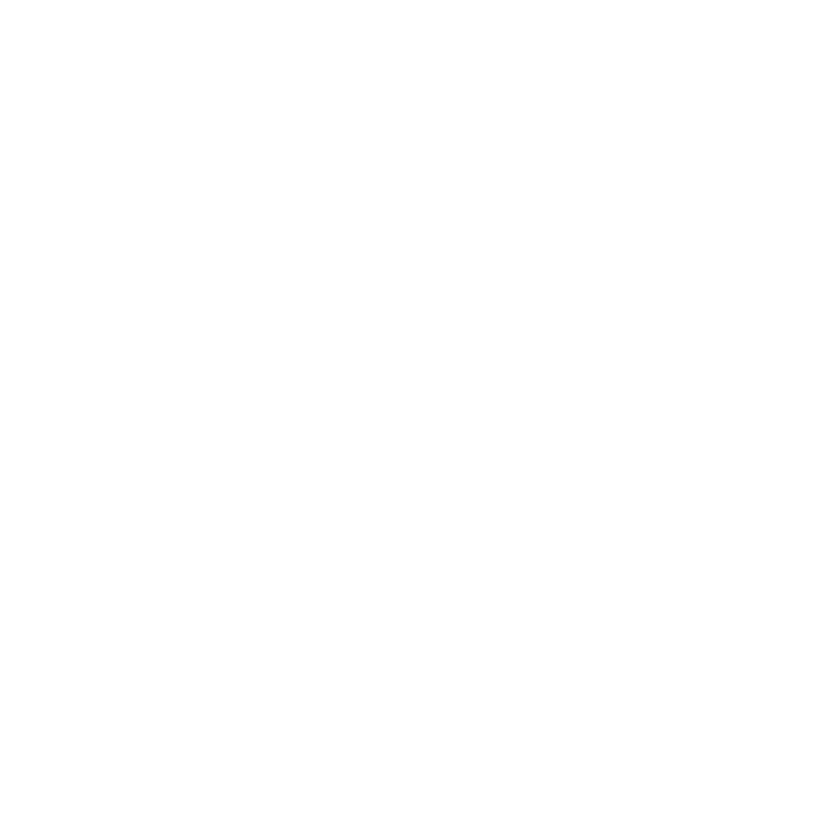

In [25]:
ggplot(reg_obs_data, aes(x=condition, y=v_reg, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=.6) + facet_grid(.~condition)

In [36]:
class(reg_obs_data)

[1] "tbl_df"     "tbl"        "data.frame"

In [40]:
?table

In [49]:
aggregate(reg_obs_data$v_reg_flipped, by=list(reg_obs_data$condition), FUN=mean)


Group.1 x        
1 hc      0.3268281
2 hv      0.3197966
3 lc      0.4838878
4 lv      0.3156021

In [50]:
reg_obs_data$t_reg

[1] 0.11447163 0.11611666 0.11642331 0.11650492 0.11653921 0.11015251
    [7] 0.11610258 0.09695455 0.10799800 0.11173160 0.11283830 0.11621026
   [13] 0.11646012 0.11652274 0.11654930 0.09883237 0.11614351 0.11627628
   [19] 0.11628759 0.11597638 0.11454232 0.11649454 0.10967595 0.11604536
   [25] 0.09848909 0.11610889 0.11342219 0.11645938 0.11648031 0.11282762
   [31] 0.11566503 0.11652138 0.11313287 0.11616308 0.11483557 0.11615065
   [37] 0.11641570 0.11216185 0.11599700 0.11643321 0.11643753 0.10733946
   [43] 0.11631358 0.11565360 0.11651768 0.11653160 0.11656293 0.11031322
   [49] 0.11635983 0.11534803 0.09867705 0.11607068 0.11649770 0.11650773
   [55] 0.11650924 0.11650377 0.10778551 0.11603142 0.11645954 0.11652611
   [61] 0.10692123 0.11582187 0.11605531 0.10811709 0.11627795 0.10973045
   [67] 0.11611965 0.11609393 0.11652619 0.11001967 0.11624945 0.11644935
   [73] 0.11651026 0.11655868 0.11647985 0.11642966 0.11261270 0.10887987
   [79] 0.11619023 0.11424532 0.11597048 0.11332607 0.11445027 0.11621853
   [85] 0.09576026 0.10778841 0.10437056 0.10705623 0.11594086 0.11544796
   [91] 0.11627554 0.11628012 0.09192945 0.11092395 0.11644235 0.11644139
   [97] 0.10021137 0.11621364 0.11486616 0.11632757 0.11598997 0.11633781
  [103] 0.11645891 0.11567728 0.11655381 0.11596013 0.11600154 0.11492269
  [109] 0.11606602 0.11637934 0.11145504 0.11587647 0.11641259 0.11644130
  [115] 0.11260703 0.11637138 0.11621553 0.11600588 0.11630014 0.11590193
  [121] 0.11627306 0.11642406 0.11519122 0.11616316 0.11212885 0.11617396
  [127] 0.10718525 0.11602563 0.11648961 0.11366150 0.11603782 0.11640735
  [133] 0.11649901 0.11653632 0.11655548 0.11605529 0.11629113 0.11549374
  [139] 0.11616319 0.11466330 0.11592126 0.11632219 0.11619066 0.11573635
  [145] 0.11380362 0.11531863 0.11627536 0.11153590 0.11570640 0.11638676
  [151] 0.11616326 0.10733424 0.11625600 0.11569458 0.11363367 0.11644490
  [157] 0.11576867 0.10193673 0.11606778 0.11602503 0.11101077 0.11605931
  [163] 0.11644404 0.11553256 0.11653484 0.11632397 0.11650667 0.11656342
  [169] 0.10771326 0.11376228 0.10521396 0.11621404 0.11648228 0.11501505
  [175] 0.11636617 0.11619630 0.11639974 0.11599213 0.11023088 0.11629327
  [181] 0.11624273 0.11652525 0.11647509 0.11656593 0.10336822 0.11611338
  [187] 0.10793731 0.11590743 0.10843386 0.11638874 0.11608079 0.11642857
  [193] 0.11654809 0.11318043 0.11516076 0.11594054 0.11219185 0.11603576
  [199] 0.11642906 0.11050773 0.11639200 0.11540355 0.11278983 0.11606424
  [205] 0.11595564 0.11623099 0.11570588 0.11577258 0.11626371 0.11655772
  [211] 0.11361698 0.10647835 0.11151934 0.11458151 0.11435998 0.11563600
  [217] 0.11555846 0.11169014 0.11536400 0.11304849 0.11611243 0.11643499
  [223] 0.11651192 0.09161518 0.09317792 0.11349858 0.11539136 0.11595490
  [229] 0.11580816 0.11629372 0.11033099 0.11562675 0.11542521 0.11643091
  [235] 0.11238883 0.11445002 0.11184911 0.11348312 0.11603311 0.10048579
  [241] 0.11577281 0.11612294 0.11646975 0.11157628 0.11599284 0.11642907
  [247] 0.10817065 0.11637515 0.11558390 0.11624504 0.11518886 0.11633673
  [253] 0.11169653 0.11599736 0.11642839 0.11651166 0.11512052 0.11653428
  [259] 0.10710217 0.11632711 0.11632521 0.11646859 0.09924454 0.11622310
  [265] 0.11648734 0.11589228 0.11646844 0.11612982 0.11621713 0.11606873
  [271] 0.11576824 0.11622806 0.11473889 0.11426621 0.11408620 0.11588373
  [277] 0.11512391 0.10943425 0.11380406 0.11551019 0.11647585 0.11452223
  [283] 0.10208176 0.11608321 0.11525911 0.10914282 0.11589152 0.11415899
  [289] 0.11615496 0.11643166 0.11637841 0.11644976 0.11211616 0.11572025
  [295] 0.11284955 0.11527366 0.11645424 0.11400542 0.11508162 0.11649418
  [301] 0.11650972 0.11656203 0.11599174 0.11165913 0.11538359 0.11349965
  [307] 0.11514571 0.11627380 0.10931011 0.11544622 0.11638652 0.10111923
  [313] 0.11630474 0.11629597 0.11337151 0.11628778 0.11527941 0.11619972
  [319] 0.11642153 0.11273339 0.11605812 0.11594883 0.11654255 0.11487582
  [325] 

In [42]:
aggregate(reg_obs_data$t_reg, by=list(reg_obs_data$condition), FUN=mean)


Group.1 x        
1 hc      0.1142886
2 hv      0.1180050
3 lc      0.1186553
4 lv      0.1194516

In [39]:
table(reg_obs_data,)

ERROR: Error in table(reg_obs_data): attempt to make a table with >= 2^31 elements


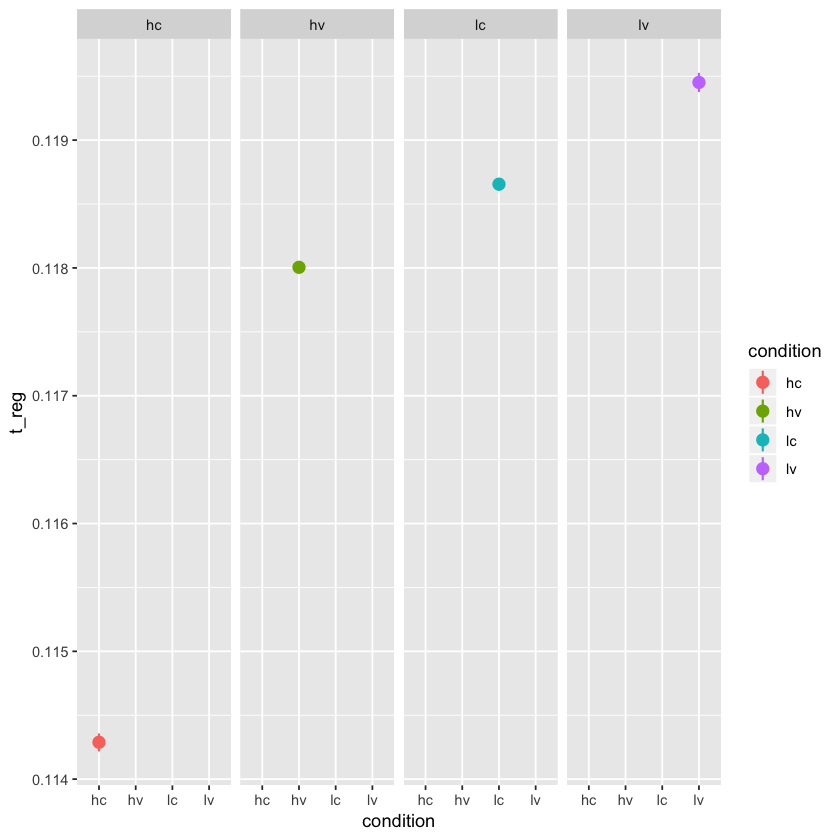

In [58]:
ggplot(reg_obs_data, aes(x=condition, y=t_reg, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=.6) + facet_grid(.~condition)

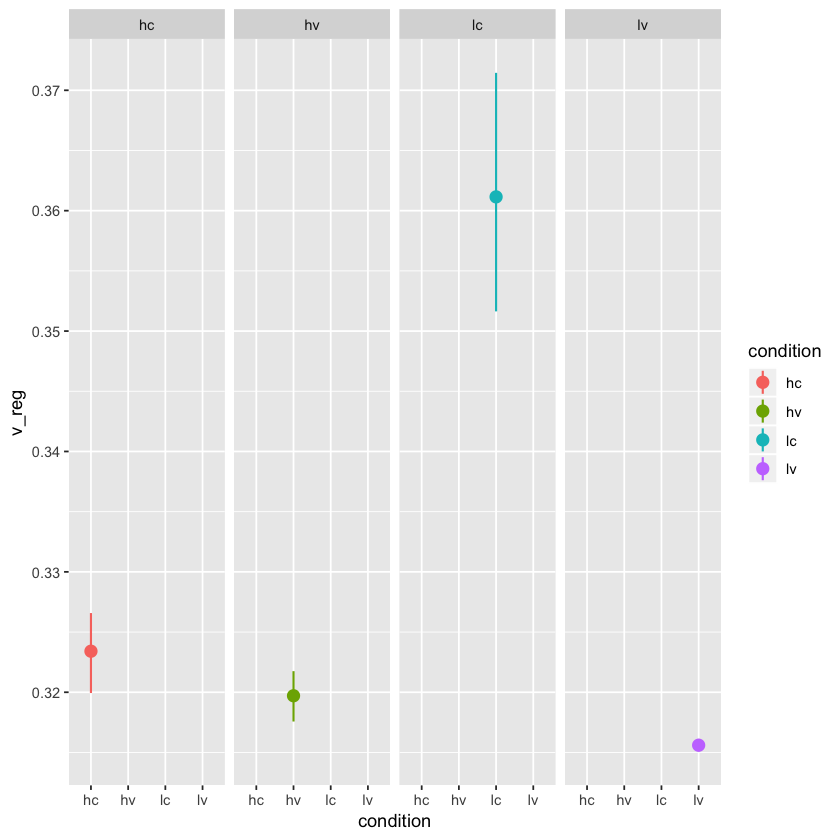

In [46]:
ggplot(reg_obs_data, aes(x=condition, y=v_reg, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=.6) + facet_grid(.~condition)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


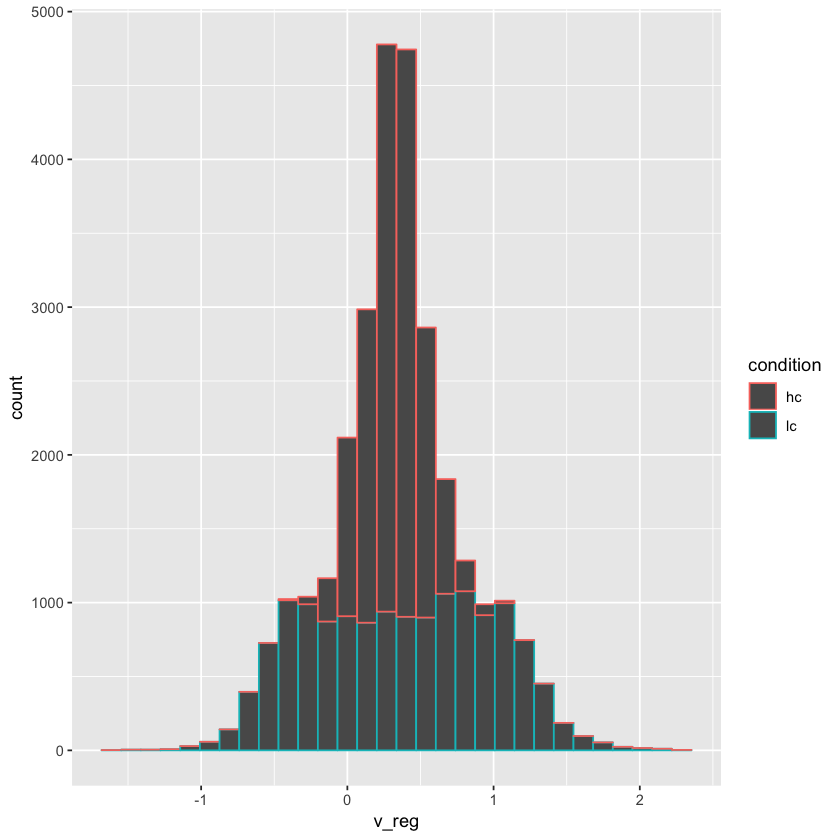

In [31]:
ggplot(subset(reg_obs_data, condition == 'lc'| condition == 'hc'), aes(v_reg, color=condition)) + geom_histogram() 